In [ ]:
!pip install -U selenium
!pip install selenium-stealth

!apt-get update
!apt install chromium-chromedriver

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

from selenium.common.exceptions import TimeoutException
import csv

from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
from selenium_stealth import stealth
import re
import csv

chrome_options = webdriver.ChromeOptions()


# google colab allows only headless mode => no gui

# disable this locally if you want to see the browser window

chrome_options.add_argument('--headless')

# set window size, click() does not work if window has no size

chrome_options.add_argument('--window-size=1920,1080')

# other options, might not be needed

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')

chrome_options.add_argument('--enable-javascript')



driver= webdriver.Chrome(options=chrome_options)



stealth(driver,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [518 kB]
Get:10 http://archive.ubuntu

Message: element click intercepted: Element <button name="showMoreButton" data-test-id="show-more-button" aria-label="..." type="button" class="uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary" disabled="">Show More</button> is not clickable at point (1104, 1062). Other element would receive the click: <section data-test-id="show-more-section" class="uitk-spacing uitk-spacing-margin-blockend-four uitk-layout-flex-item">...</section>
  (Session info: headless chrome=117.0.5938.92)
Stacktrace:
#0 0x57ee6dd996b3 <unknown>
#1 0x57ee6da6f1e7 <unknown>
#2 0x57ee6dabc65d <unknown>
#3 0x57ee6daba9fd <unknown>
#4 0x57ee6dab87b8 <unknown>
#5 0x57ee6dab7827 <unknown>
#6 0x57ee6daac4f9 <unknown>
#7 0x57ee6dad80c2 <unknown>
#8 0x57ee6daabf16 <unknown>
#9 0x57ee6dad828e <unknown>
#10 0x57ee6daf1322 <unknown>
#11 0x57ee6dad7e93 <unknown>
#12 0x57ee6daaa934 <unknown>
#13 0x57ee6daab71e <unknown>
#14 0x57ee6dd5ecb8 <unknown>
#15 0x57ee6dd62bf0 <unknown>
#16 0x57ee6dd6d19c <unknow

(<selenium.webdriver.chrome.webdriver.WebDriver (session="d25590c17c747732541f1ac72b24ef6d")>,
 '<html data-language="en_US" dir="ltr" lang="en"><head><title>HEL to CDG flights</title><meta charset="UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta name="viewport" content="width=device-width, initial-scale=1.0"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="mobile-web-app-capable" content="yes"><meta name="theme-color" content="#000000"><link type="image/x-icon" href="/favicon.ico" sizes="16x16 32x32" rel="shortcut icon"><link type="image/x-icon" href="/favicon.ico" sizes="16x16 32x32" rel="icon"><link rel="apple-touch-icon" href="/favicon.ico"><link rel="preload" href="https://c.travel-assets.com/flights-shopping-pwa/l10nBundle/en_US.3a1ee44fba4c617e9bcc.js" as="script"><link rel="preload" href="https://c.travel-assets.com/flights-shopping-pwa/bernie.157d0735c85f28653af0.js" as="script"><link rel="preload" href="https://c.travel-assets.com
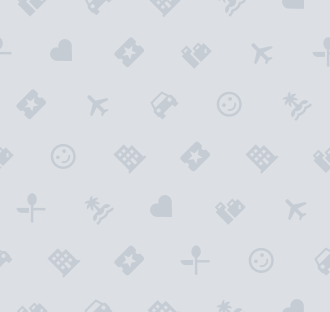

In [ ]:
def press_button_pagination(driver):
    try:
        more_button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
               (By.XPATH, "//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary']")
            )
        )
        more_button.click()
        WebDriverWait(driver, 30)
    except Exception as e:
        print(str(e))

def initialize_driver(url):
    driver.get(
        url,
    )
    for _ in range(10):
        try:
          WebDriverWait(driver, 20).until(
              EC.presence_of_element_located(
                (By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary'])")
              )
          )
          press_button_pagination(driver=driver)
        except Exception as e:
            print(str(e))

    webpage = driver.page_source
    return driver, webpage

initialize_driver("https://www.expedia.com/Flights-Search?leg1=from%3AHelsinki%20%28HEL-Vantaa%29%2Cto%3AParis%20%28CDG-Roissy-Charles%20de%20Gaulle%29%2Cdeparture%3A10%2F28%2F2023TANYT&mode=search&options=carrier%3A%2Ccabinclass%3A%2Cmaxhops%3A1%2Cnopenalty%3AN&pageId=0&passengers=adults%3A1%2Cchildren%3A0%2Cinfantinlap%3AN&pwaDialog=updatedialog&trip=oneway")



In [ ]:
# driver.get("https://www.skyscanner.net/transport/flights/hel/pari/231021/?adultsv2=1&cabinclass=economy&childrenv2=&inboundaltsenabled=false&outboundaltsenabled=false&preferdirects=false&rtn=0")
# WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, "//button[@class='BpkButtonBase_bpk-button__ZGM2M BpkButtonSecondary_bpk-button--secondary__MjEzZ']"))).click()


In [ ]:
airlines = []
arrival = []
departure = []
stops = []
prices = []
duration = []
layover = []
layover_city = []



def extract_flight_info(text):
    # Define the regular expression pattern
    pattern = r'for (.*?) flight'

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return match.group(1)
    else:
        # Return None if no match was found
        return None

def extract_arrival_info(text):
    # Define the regular expression pattern
    pattern = r'departing at (.*?) from'

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return match.group(1)
    else:
        # Return None if no match was found
        return None

def extract_departure_info(text):
    # Define the regular expression pattern
    pattern = r'arriving at (.*?) in'

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return match.group(1)
    else:
        # Return None if no match was found
        return None


def extract_stop_info(text):
    # Define the regular expression pattern
    pattern = r'total travel time, (.*?)stop'

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        if(match.group(1)== "Two "):
          return 2
        elif(match.group(1)== "One "):
          return 1
        else:
          return 0
    else:
        # Return None if no match was found
        return None

def extract_prices_info(text):
    # Define the regular expression pattern
    pattern = r'Priced at (.*?) '

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return int(match.group(1).replace("$", ""))
    else:
        # Return None if no match was found
        return None

def extract_duration_info(text):
    # Define the regular expression pattern
    pattern = r"\s*(\d+ hours \d+ minutes)\s*total travel time"

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return match.group(1)
    else:
        # Return None if no match was found
        return None


def extract_layover_info(text):
    # Define the regular expression pattern
    pattern = r'Layover for (.*?) in'

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return match.group(1)
    else:
        # Return None if no match was found
        return None

def extract_layover_city_info(text):
    # Define the regular expression pattern
    pattern = r"^.*in\s+(\w+)\."

    # Use re.search to find the first match in the text
    match = re.search(pattern, text)

    # Check if a match was found
    if match:
        # Extract and return the captured group (the part between "for " and " flight")
        return match.group(1)
    else:
        # Return None if no match was found
        return None

flights = driver.find_elements(By.XPATH, "//button[@class = 'uitk-card-link']")

print(len(flights))
# print(len(flights))
for flight in flights:
    airlines1 = extract_flight_info(flight.text)
    arrival1 = extract_arrival_info(flight.text)
    departure1 = extract_departure_info(flight.text)
    stops1 = extract_stop_info(flight.text)
    prices1 = extract_prices_info(flight.text)
    duration1 = extract_duration_info(flight.text)
    layover1 = extract_layover_info(flight.text)
    layover_city1 = extract_layover_city_info(flight.text)
    # print(stops1)
    # print(flight.text)


    # arrival_times.append(arrival_time)
    airlines.append(airlines1)
    arrival.append(arrival1)
    departure.append(departure1)
    stops.append(stops1)
    prices.append(prices1)
    duration.append(duration1)
    layover.append(layover1)
    layover_city.append(layover_city1)
# print(arrival_times)


79


In [ ]:
print(len(arrival))
print(len(stops))
print(len(prices))
print(len(duration))
print(len(airlines))
print(len(layover))
print(len(layover_city))

79
79
79
79
79
79
79


In [ ]:
import pandas as pd

column_names = ["arrival","departure","stops","prices", "duration", "airline", "layover", "layover_city"]

with open("expedia.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(column_names)


    for i in range(len(arrival)):
        writer.writerow([arrival[i], departure[i], stops[i],
                         prices[i], duration[i], airlines[i], layover[i], layover_city[i]])


df = pd.read_csv("/content/expedia.csv")
df.head()

,arrival,departure,stops,prices,duration,airline,layover,layover_city
0,7:00am,10:15am,1,120,4 hours 15 minutes,Scandinavian Airlines,0 hours 45 minutes,Copenhagen
1,7:00am,3:20pm,1,120,9 hours 20 minutes,Scandinavian Airlines,5 hours 50 minutes,Copenhagen
2,11:15am,3:20pm,1,134,5 hours 5 minutes,Scandinavian Airlines,1 hour 35 minutes,Copenhagen
3,5:25am,9:00am,1,150,4 hours 35 minutes,Air Baltic,0 hours 45 minutes,Riga
4,6:10am,9:05pm,1,151,15 hours 55 minutes,Lufthansa,11 hours 40 minutes,Munich
